# **Labor del Péndulo**

por: Juan Manuel Calvo Duque - Lina Marcela García Palacio

**Planteamiento del Problema:** \
La labor propuesta consiste en desarrollar un estudio exhaustivo del comportamiento de un péndulo no lineal bajo dos condiciones de oscilación: Pequeños y grandes ángulos. El análisis abarca la modelación matemática del sistema, la realización de simulaciones numéricas para resolver las ecuaciones de movimiento no lineales y la comparativa de estos resultados con datos experimentales reales. Ajustar el parámetro de la frecuencia natural del péndulo es el objetivo, con base en los resultados obtenidos, para validar la precisión del modelo teórico frente a la complejidad del fenómeno físico observado. Esta labor resaltar la importancia de combinar métodos analíticos y numéricos con experimentación directa, que permite una comprensión más profunda de los sistemas dinámicos no lineales.

Inicialmente, se importan las librerías necesarias para el desarrollo de la actividad: Numpy, scipy, matplotlib y pandas

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt 
import pandas as pd

## Datos para $ \theta_0 < 10°$

Se lee el archivo en formato .csv de los datos experimentales para un ángulo menor a 10 grados. En este caso, se especifica el delimitador y el separador decimal.

In [2]:
df = pd.read_csv('Data_T010.csv', delimiter=';', decimal=',')

Ya que se importan los datos mediante un dataframe, se separan las columnas y se convierten a arreglos en Numpy 

In [3]:
tiempo = df['Tiempo (ms)'].to_numpy()
angulos = df['Ángulo 1'].to_numpy()

Se define una función, a la cual se le asocia el modelo:
$$ \theta = \theta_{max} sin(w_n*t+\phi) $$

In [4]:
def modelo_pendulo(t, theta_m, omega_n, phi):
    return theta_m * np.sin(np.radians(np.degrees(omega_n)*(t/1000)+phi))

Se utiliza la función **curve_fit** de scipy para encontrar los parámetros óptimos $ \theta_{max},  w_n$ y  $ \phi $ que mejor ajustan la función **modelo_pendulo** a los datos experimentales tomados. 

In [9]:
# Ajuste de regresión no lineal
T = 0.8
popt, pcov = curve_fit(modelo_pendulo, np.linspace(0,800, len(df['Tiempo (ms)'])), angulos, p0=[max(angulos), 2 * np.pi / T, 0])

Se obtienen los valores óptimos para los tres parámetros mencionados anteriormente, y se muestra, en particular, el parámetro de interés ($w_n$)

In [11]:
theta_m_opt, omega_n_opt, phi_opt = popt
print(f"Frecuencia angular natural ajustada: {omega_n_opt} deg/s")

Frecuencia angular natural ajustada: 7.530236946106024 deg/s


Se hace una gráfica que contiene los valores experimentales y la curva generada por el modelo ajustado.

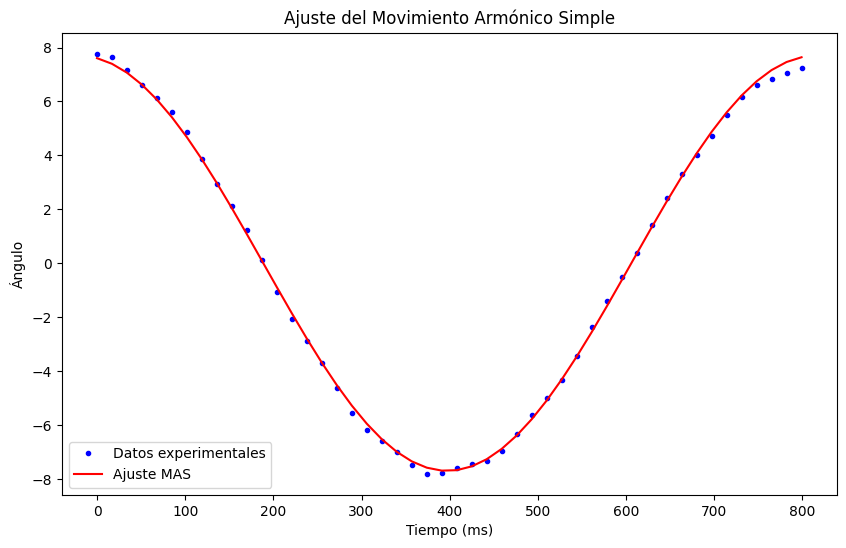

In [17]:
# Graficar los datos y el ajuste
plt.figure(figsize=(10, 6))
plt.plot(tiempo, angulos, 'b.', label='Datos experimentales')
plt.plot(tiempo, modelo_pendulo(tiempo, *popt), 'r-', label='Ajuste MAS')
plt.title('Ajuste del Movimiento Armónico Simple')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Ángulo')
plt.legend()
plt.show()

## Datos para $ \theta_0 > 10°$

Se lee el archivo en formato .csv de los datos experimentales para un ángulo mayor a 10 grados. En este caso, se especifica el delimitador y el separador decimal.

In [18]:
df_g = pd.read_csv('Data_T040.csv', delimiter=';', decimal=',')

Ya que se importan los datos mediante un dataframe, se separan las columnas y se convierten a arreglos en Numpy

In [19]:
tiempo_g = df_g['Tiempo (ms)'].to_numpy()
angulos_g = df_g['Ángulo 1'].to_numpy()

Se hace una gráfica que contiene los valores experimentales y la curva generada por el modelo ajustado.

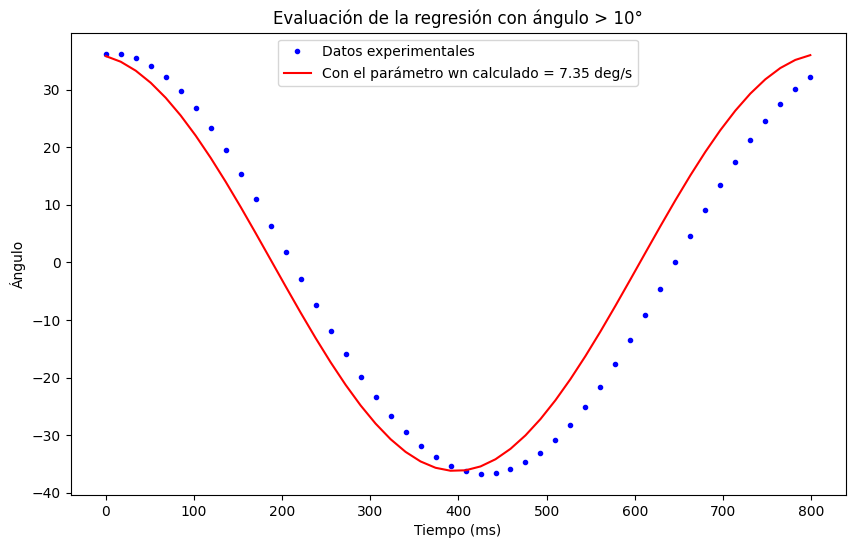

In [33]:
# Graficar los datos y el ajuste
plt.figure(figsize=(10, 6))
plt.plot(tiempo_g, angulos_g, 'b.', label='Datos experimentales')
plt.plot(tiempo_g, modelo_pendulo(tiempo_g, max(angulos_g), omega_n_opt, phi_opt), 'r-', label='Con el parámetro wn calculado = 7.35 deg/s')
plt.title('Evaluación de la regresión con ángulo > 10°')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Ángulo')
plt.legend()
plt.show()

### Ajuste mediante Método numérico 
\
Para ajustar el modelo del pendulo para un ángulo inicial mayor a 10 grados, se desarrolla un método numérico, para esto se incluye una nueva librería:

In [21]:
from scipy.integrate import solve_ivp
from scipy.integrate import odeint

In [22]:
#constantes:
theta_0_deg = 36.2149 
theta_0 = np.deg2rad(theta_0_deg)
omega_0 = 0

In [23]:
#Tiempos
t_evaluation = np.linspace(0, 0.8, 100)

In [24]:
#Función para el método numérico
def metodo_num_pendulo(t, y):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = -((omega_n_opt)**2)*np.sin(theta)
    return [dtheta_dt, domega_dt]

#### Solución mediante **solve_ivp**

In [25]:
#Solución del método numérico
solucion = solve_ivp(metodo_num_pendulo, (0, 0.8), [theta_0, omega_0], t_eval=t_evaluation)
solucion_deg = np.rad2deg(solucion.y[0])



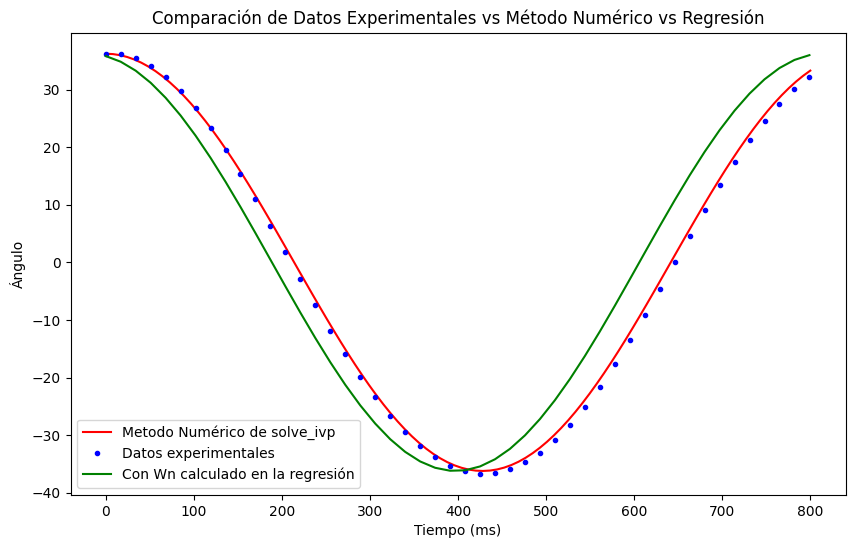

In [34]:
# Graficar los datos y el ajuste
plt.figure(figsize=(10, 6))
plt.plot(solucion.t*1000, solucion_deg, 'r', label='Metodo Numérico de solve_ivp')
plt.plot(tiempo_g, angulos_g, 'b.',label='Datos experimentales')
plt.plot(tiempo_g, modelo_pendulo(tiempo_g, max(angulos_g), omega_n_opt, phi_opt), 'g-', label='Con Wn calculado en la regresión')
plt.title('Comparación de Datos Experimentales vs Método Numérico vs Regresión')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Ángulo')
plt.legend()
plt.show()

#### Solución mediante **odeint**

In [27]:
#constantes:
theta_0_deg = 36.2149 
theta_0 = np.deg2rad(theta_0_deg)
omega_0 = 0

In [28]:
t_span = np.linspace(0, 0.8, 100)

In [29]:
#Función para el método numérico
def metodo_num_pendulo(y, t):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = -((omega_n_opt)**2)*np.sin(theta)
    return [dtheta_dt, domega_dt]

In [30]:
y0 = [theta_0, omega_0]
solucion_odeint = odeint(metodo_num_pendulo, y0, t_span)

In [31]:
solucion_odeint_grad = np.rad2deg(solucion_odeint[:, 0])

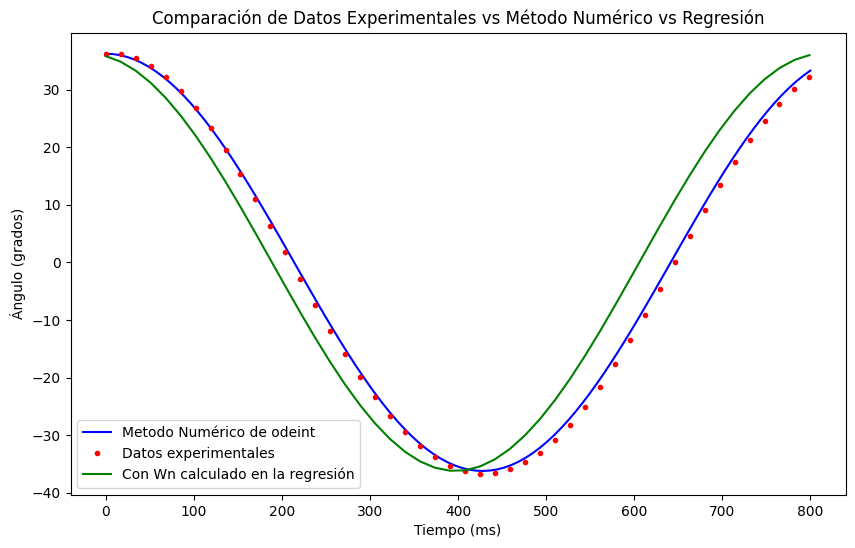

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(t_span*1000, solucion_deg, 'b-', label='Metodo Numérico de odeint')  # Convertir tiempo a milisegundos
plt.plot(tiempo_g, angulos_g, 'r.', label='Datos experimentales')
plt.plot(tiempo_g, modelo_pendulo(tiempo_g, max(angulos_g), omega_n_opt, phi_opt), 'g-', label='Con Wn calculado en la regresión')
plt.title('Comparación de Datos Experimentales vs Método Numérico vs Regresión')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Ángulo (grados)')
plt.legend()
plt.show()